## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 3

- **100 points [7% of your final grade]**
- **Due April 10, 2022 by 11:59pm**

*Goals of this homework:* In this homework, you will investigate data visualization and the foundations of recommendation.



*Submission instructions:* This homework is a bit different from the previous ones. For the visualizatin component, you will post to Campuswire. See below for details. For the recommendation component, rename this notebook as `UIN_hw3.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be `123456789_hw2.ipynb`. Submit this notebook via Canvas. Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late policy:* No late days for the data visualization. For the recommendaiton, you may use up to three of your late days. No homeworks will be accepted after April 13 11:59pm.

## Collaboration Declaration:

***You must add all of your collaboration declarations here. Who did you talk to about this assignment? What web resources did you use? Etc.***

For example:
* Part 3a: I talked to Amy about how to split the data randomly. She helped me understand that I needed to use a random number generator.
* Part 3b: I needed help on how to comment my code, so I relied on this StackOverflow thread: https://stackoverflow.com/questions/184618/what-is-the-best-comment-in-source-code-you-have-ever-encountered
* (Replace this bullet list with your own collaboration declarations.)


## (30 points) Part 1: Data Visualization (submit to Campuswire, no late days)

For this first part, you will create a data visualization based on an exploration of a dataset we provide. Your visualization should capture Tufte's principles of graphical excellence: "complex ideas communicated with clarity, precision, and efficiency."

### The Data
You must choose one of the following datasets:

* Police Shootings: The Washington Post's database contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015
    * [data](https://github.com/washingtonpost/data-police-shootings)
    * [website](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) (including some example charts)

* Bike Sharing: This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
    * [data](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

* Tennis Time: A dataset of tennis players and how much time they take.
    * [data](https://github.com/fivethirtyeight/data/tree/master/tennis-time)
    * [article](https://fivethirtyeight.com/features/why-some-tennis-matches-take-forever/)

### Your Goal
1. Identify an interesting story or insight from this data
2. Carefully design a data visualization that communicates this story.

You may assume that your audience is the **general public.**

You may clean, manipulate, and transform the data as you like. You are free to use external data from whatever sources you like. (But be sure to cite them!). Feel free to use as little or as much data as you like, so long as the story (and associated data visualization are compelling). 


### What to Submit

Utimately you should produce:


1. A single image (e.g., PNG, PDF, JPG) that effectively communicates the data. You must use a Python visualization toolkit as your key tool, but you are welcome to augment with other tools if you like (e.g., Photoshop, MS Paint, GIMP). For Python viz tools, you may use matplotlib, plotly, seaborn, geoplotlib, bokeh, networkx, or whatever else you can find.
    
2. A brief explanation describing your design. (a few paragraphs, 1/2 page or so).

Your explanation should justify the design choices you have made. 

* Why did you choose the particular visualization type? 
* What motivated your choice of size, color,
and scale? 
* Why are they appropriate for what you are trying to communicate?
* Additionally, your explanation should document:
    * What you are trying to
communicate
    * The benefits of your choice of visualization
    * As well as any downsides
to your viz (e.g., are certain connections downplayed due to your choices?).

### How to Submit
You should post your image + explanation to Campuswire by April 10 (no late days).

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataDF = pd.read_csv('fatal-police-shootings-data.csv')
dataDF.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


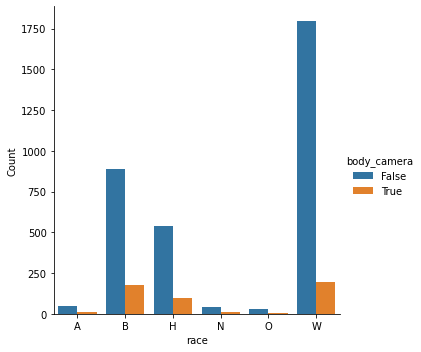

In [34]:
lies = dataDF.groupby(['body_camera', "threat_level", 'race']).count().unstack().reset_index()[['body_camera','threat_level','id']]
dat = lies[lies['threat_level']=='attack']
dat.columns = ['body_camera','threat_level','A','B','H','N','O','W']
df = pd.melt(dat, id_vars="body_camera", var_name="race", value_name="Count")[2:].reset_index().drop('index',axis='columns')
sns.catplot(x='race', y='Count', hue='body_camera', data=df, kind='bar')

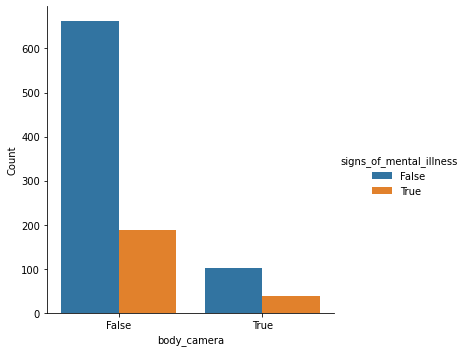

In [35]:
wrongfully = dataDF.groupby(['body_camera', 'race', 'signs_of_mental_illness']).count()
df = wrongfully['id'].reset_index()
df.rename({'id':'Count'},axis=1, inplace=True)
sns.catplot(x='body_camera', y='Count', hue='signs_of_mental_illness', data=df, kind='bar',ci = None)

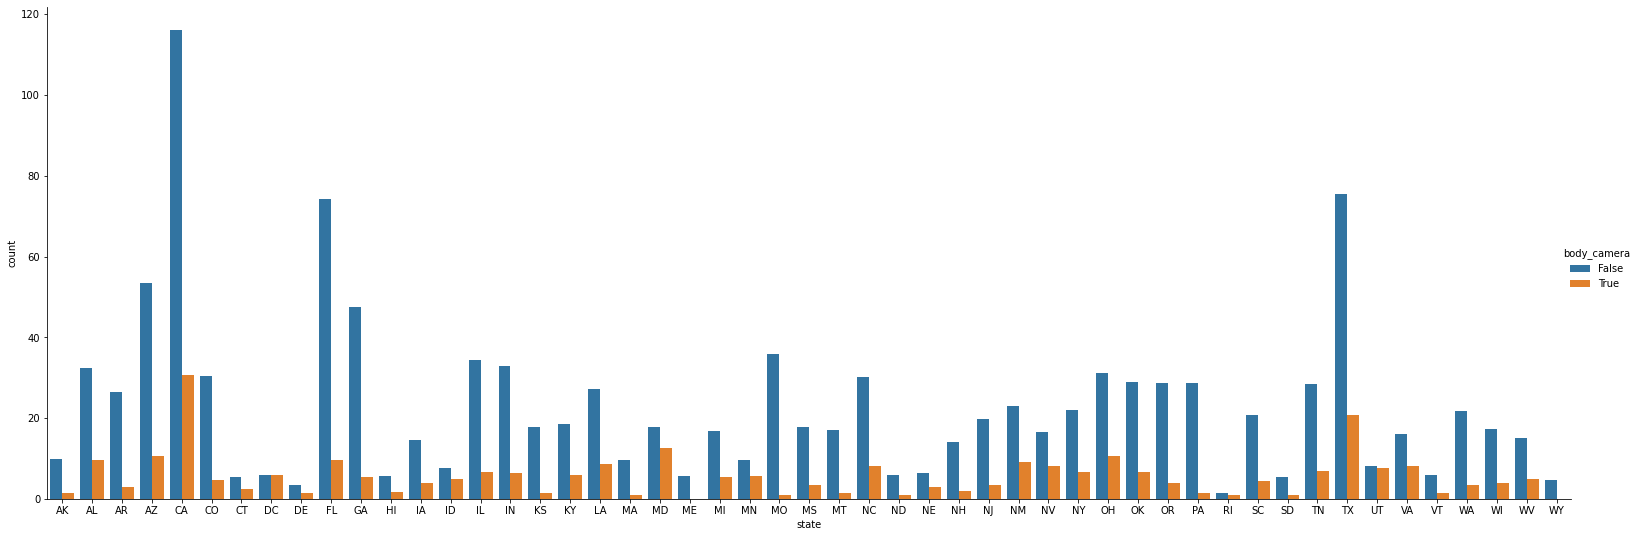

In [36]:
statewise = dataDF.groupby(['state','body_camera', 'race']).count()['id'].reset_index()
statewise.columns = ['state','body_camera','race','count']
sns.catplot(x='state', y='count', hue='body_camera', data=statewise, kind='bar',ci = None)
fig = plt.gcf()
plt.tight_layout()
fig.set_size_inches(25, 8)

In [37]:
statewise = dataDF.groupby(['body_camera', 'state']).count()['id'].reset_index()
body_cam_on = statewise[statewise['body_camera']==True].drop('body_camera',axis=1).reset_index().drop('index',axis=1)
body_cam_off = statewise[statewise['body_camera']==False].drop('body_camera',axis=1)
comb=body_cam_on.merge(body_cam_off, left_on='state', right_on='state', suffixes=('with_cam', 'without_cam'))
comb['ratio'] = comb['idwithout_cam']/comb['idwith_cam']
comb.sort_values(['ratio'], inplace=True, ascending=False)
# comb.iloc[:-5:-1]
comb.iloc[:5]

,state,idwith_cam,idwithout_cam,ratio
23,MO,3,187,62.333333
37,PA,5,145,29.000000
40,SD,1,23,23.000000
19,MA,3,50,16.666667
25,MT,3,43,14.333333


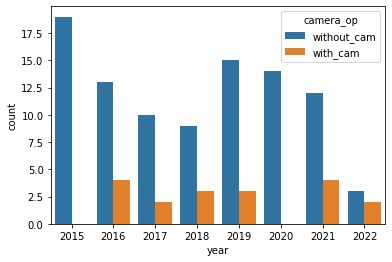

In [38]:
specific_state = dataDF[dataDF['state']=='SC'].reset_index().drop('index',axis=1)
specific_state['year'] = pd.to_datetime(specific_state['date']).dt.year
specific_state.drop('date',axis=1)
dat = specific_state.groupby(['year','body_camera']).agg({"body_camera":"count"}).unstack().reset_index()
dat.columns = ['year','without_cam','with_cam']
cat = pd.melt(dat, id_vars="year", value_vars=['without_cam', 'with_cam'])
cat.columns = ['year','camera_op','count']
cat=cat.sort_values(['year']).reset_index().drop('index',axis=1)
sns.barplot(x='year', y='count', hue='camera_op', data=cat,ci = None)

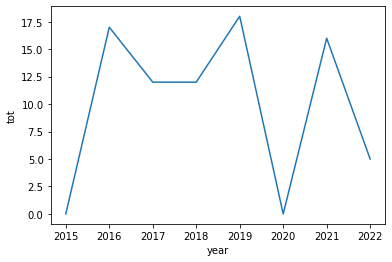

In [39]:
dat['tot'] = dat['without_cam']+dat['with_cam']
dat['tot']= dat['tot'].fillna(0)
sns.lineplot(x='year', y='tot', data=dat)

### Grading Breakdown

- 10%: Interestingness and clarity of question you ask
- 20%: Appropriateness of data, scale, and other viz design choices
- 10%: Legends, context, and titles of your viz
- 20%: Overall quality of your viz: in the extreme, every pixel serves a purpose
- 20%: Design rationale (writeup)
- 20%: Pros and cons of your design (writeup)


## (5 points) Part 2: Data Viz Critique (on Campuswire by April 17)

After all the data visualizations have been posted to Campuswire, you will be responsible for providing a critique of **at least two** data visualizations provided by your classmates. 

You should reply in the thread and provide a brief *constructive* critique. Do your best to load balance, so that every data visualization receives some feedback.

On the final homework, each student will have an opportunity to revise the original data visualization based on this feedback.



## (65 points) Part 3: Recommendation with User Ratings (Explicit Feedback) 

In this part, we focus on the rating prediction recommendation task with explicit feedback. We will:

* load and process the MovieLens 1M dataset, 
* build a baseline estimation model,
* build a collaborative filtering model,
* build a matrix factorization model,
* and try to improve upon these models.

First, we need to load and preprocess the experiment dataset. We use the MovieLens 1M data from https://grouplens.org/datasets/movielens/1m/ in this homework. The code has been provided in the next cell, and you need to run it. The resulting data variables are: train_mat is the numpy array variable for training data of size (#users, #items) with non-zero entries representing user-item ratings, and zero entries representing unknown user-item ratings; and test_mat is the numpy array variable for testing data of size (#users, #items).

In [1]:
# if you're using colab, this is a clunky way to load the ratings.dat file we need
# navigate in your finder to ratings.dat when asked
from google.colab import files
uploaded = files.upload()

Saving ratings.dat to ratings.dat


In [29]:
import io
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

data_df = pd.read_csv(io.BytesIO(uploaded['ratings.dat']), sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

# if you are running this notebook locally, you can replace above with something like this:
# data_df = pd.read_csv('./ratings.dat', sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

# First, generate dictionaries for mapping old id to new id for users and movies
unique_MovieID = data_df['MovieID'].unique()
unique_UserID = data_df['UserID'].unique()
j = 0
user_old2new_id_dict = dict()
for u in unique_UserID:
    user_old2new_id_dict[u] = j
    j += 1
j = 0
movie_old2new_id_dict = dict()
for i in unique_MovieID:
    movie_old2new_id_dict[i] = j
    j += 1
    
# Then, use the generated dictionaries to reindex UserID and MovieID in the data_df
user_list = data_df['UserID'].values
movie_list = data_df['MovieID'].values
for j in range(len(data_df)):
    user_list[j] = user_old2new_id_dict[user_list[j]]
    movie_list[j] = movie_old2new_id_dict[movie_list[j]]
data_df['UserID'] = user_list
data_df['movieID'] = movie_list

# generate train_df with 70% samples and test_df with 30% samples, and there should have no overlap between them.
train_index = np.random.random(len(data_df)) <= 0.7
train_df = data_df[train_index]
test_df = data_df[~train_index]

# generate train_mat and test_mat
num_user = len(data_df['UserID'].unique())
num_movie = len(data_df['MovieID'].unique())

train_mat = coo_matrix((train_df['Rating'].values, (train_df['UserID'].values, train_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()
test_mat = coo_matrix((test_df['Rating'].values, (test_df['UserID'].values, test_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


## Part 3a: Build the Baseline Estimation Model (15 points)

First, let's implement a simple personalized recommendation model -- the baseline estimate -- introduced in class: $b_{u,i}=\mu+b_i+b_u$, where $\mu$ is the overall mean rating for all items, $b_u$ = average rating of user $u-\mu$, $b_i$ = average rating of item $i-\mu$. Store your prediction as a numpy array variable 'prediction_mat' of size (#users, #movies) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: for users who do not have ratings in train_mat, set $b_u=0$ for them; and for movies which do not have ratings in train_mat, set $b_i=0$ for them

In [3]:
# calculate the prediction_mat by the baseline estimation recommendation algorithm
# Your Code Here...
# ref: https://stackoverflow.com/questions/44913275/how-to-ignore-values-when-using-numpy-sum-and-numpy-mean-in-matrices
import math

prediction_mat = train_mat.copy()
prediction_mat[prediction_mat == 0] = np.nan
mu = np.nanmean(prediction_mat)
print('. Global Average Rating is {}'.format(mu))

bi = [np.nanmean(prediction_mat[:, idx]) - mu for idx in range(prediction_mat.shape[1])]
bi = [0 if np.isnan(x) else x for x in bi]
bu = [np.nanmean(prediction_mat[idx, :]) - mu for idx in range(prediction_mat.shape[0])]
bu = [0 if np.isnan(x) else x for x in bu]


for u in range(prediction_mat.shape[0]):
  for i in range(prediction_mat.shape[1]):
    prediction_mat[u, i] = bu[u] + bi[i] + mu
prediction_mat = np.nan_to_num(prediction_mat)

. Global Average Rating is 3.5817790786786565


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


Now, with this prediction_mat based on the baseline estimate, let's calculate the RMSE to evaluate the quality of the baseline estimate model. Please print out the RMSE of your prediction_mat using test_mat in the next cell.


In [4]:
# calculate and print out the RMSE for your prediction_df and the test_df
# Your Code Here...
error = 0
test_userid, test_movieid = test_mat.nonzero()
testing_indices = np.arange(len(test_userid))
for i in testing_indices:
  error += (test_mat[test_userid[i]][test_movieid[i]] - prediction_mat[test_userid[i]][test_movieid[i]])**2
rmse = math.sqrt(error/len(test_userid))
print("Root mean squared error for the baseline estimation method is {}".format(rmse))

Root mean squared error for the baseline estimation method is 0.9383771058244149


## Part 3b: Collaborative Filtering with Jaccard Similarity (15 points)

In this part, you need to build a collaborative filtering recommendation model with **Jaccard similarity** to predict user-movie ratings. 

The prediction of the score for a user-item pair $(u,i)$ should use the formulation: $p_{u,i}=\bar{r}_u+\frac{\sum_{u^\prime\in N}s(u,u^\prime)(r_{u^\prime,i}-\bar{r}_{u^\prime})}{\sum_{u^\prime\in N}|s(u, u^\prime)|}$ as introduced in class, where $s(u, u^\prime)$ is the Jaccard similarity. We set the size of $N$ as 10.

In the next cell, you need to write your code to implement this algorithm, and generate a numpy array variable named 'prediction_mat' of size (#user, #movie) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: when you find the nearest neighbor set $N$ of a user $u$, do not include user $u$ in $N$  


In [ ]:
# calculate the prediction_mat by your user-user collaborative filtering recommendation algorithm
# Your Code Here...
!curl https://colab.chainer.org/install | sh -
import cupy as cp

def Jaccard(A):
  B = cp.ones((A.shape[0],A.shape[1]))
  B[A == 0] = 0
  matr = cp.array([cp.divide(cp.logical_and(B[i,:], B).sum(axis=1),cp.logical_or(B[i,:], B).sum(axis=1)) for i in range(A.shape[0])])
  # matr = cp.nan_to_num(matr)
  args_srt = cp.argsort(matr)
  return matr, args_srt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   6869      0 --:--:-- --:--:-- --:--:--  6839
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 58.9 MB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 33.5 MB/s 
+ set +ex
Installation succeeded!


In [ ]:
jacc,srt_args = Jaccard(train_mat)

In [ ]:
gpu_train = cp.array(train_mat)
prediction_mat_2 = cp.zeros((gpu_train.shape[0], gpu_train.shape[1]))

user_matr = train_mat.copy()
user_matr[user_matr == 0] = np.nan
b_user = [np.nanmean(user_matr[idx, :]) for idx in range(prediction_mat.shape[0])]
gpu_bu = cp.array(b_user)
util = cp.zeros((gpu_train.shape[0], gpu_train.shape[1]))

for u in range(prediction_mat_2.shape[0]):
    util[u,gpu_train[u,:]==0] = gpu_bu[u]
aux = util+gpu_train

for u in range(gpu_train.shape[0]):
    args_ = srt_args[u,-11:-1:1]
    r_bar = gpu_bu[args_]
    weights = jacc[u,args_].transpose()
    diff_rate = (aux[args_, :].transpose()-r_bar).transpose()
    weighted_sum = (diff_rate.transpose()*weights).transpose()
    prediction_mat_2[u,:] = gpu_bu[u]*cp.ones(gpu_train.shape[1]) + weighted_sum.sum(axis=0)/(abs(weights).sum())

# prediction_mat_2 = cp.nan_to_num(prediction_mat_2)
host_pred_2 = cp.asnumpy(prediction_mat_2)

Please print out the RMSE of your prediction_mat using test_mat in the next cell.

In [ ]:
# calculate and print out the RMSE for your prediction_df and the test_df
# Your Code Here...
error_cf = 0
test_userid, test_movieid = test_mat.nonzero()
testing_indices = np.arange(len(test_userid))
for i in testing_indices:
  error_cf += (test_mat[test_userid[i]][test_movieid[i]] - host_pred_2[test_userid[i]][test_movieid[i]])**2
rmse_cf = math.sqrt(error_cf/len(testing_indices))
print("Root mean squared error for the baseline estimation method is {}".format(rmse_cf))

Root mean squared error for the baseline estimation method is 0.9826513496842374


Comparing the RMSE results of this collaborative filtering and the baseline estimate algorithm, what do you observe? Is the  collaborative filtering the one producing the best performance? What reasons do you think can explain what you observe?

From the above result, it looks like poeple-people collaborative filtering performs worse than base line estimate. There can be multiple reasons for such an observation which include:


*   Less data point - Since there is less data, the users which we think match the most with our current user has atmax a similarity score of 15%-20%
* Individuality - Every user is individual. Thus, no matter how hard we search, we may never be able to find two users with exactly the same set of likings/ratings.
* Small Neighbourhood - Since our neighbourhood is small (of only 10 users), the would be very rare to find more than sufficient percent of the users to rate a specific movie which the current user has not rated.
*   Corner case - it might be possible that in the complete neighbourhood of our current user, no one has rated a particular movie. Thus, for such a case, user-user CF would simply use user average rating migh completes the ignore the characterstics of the item (lets say an Action Thriller is generally rated more as compared to a Rom-Com)



## Part 3c: Matrix Factorization (15 points)

Now we turn to matrix factorization. First, let's implement the matrix factorization (MF for short) model introduced in class. The MF model can be mathematically represented as: 

<center>$\underset{\mathbf{P},\mathbf{Q}}{\text{min}}\,\,L=\sum_{(u,i)\in\mathcal{O}}(\mathbf{P}_u\cdot\mathbf{Q}^\top_i-r_{u,i})^2+\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$,</center>
    
where $\mathbf{P}$ is the user latent factor matrix of size (#user, #latent); $\mathbf{Q}$ is the movie latent factor matrix of size (#movie, #latent); $\mathcal{O}$ is a user-movie pair set containing all user-movie pairs having ratings in train_mat; $r_{u,i}$ represents the rating for user u and movie i; $\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$ is the regularization term to overcome overfitting problem, $\lambda$ is the regularization weight (a hyper-parameter manually set by developer, i.e., you), and $\lVert\mathbf{P}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{P}_{x,y})^2$, $\lVert\mathbf{Q}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{Q}_{x,y})^2$. Such an L function is called the **loss function** for the matrix factorization model. The goal of training an MF model is to find appropriate $\mathbf{P}$ and $\mathbf{Q}$ to minimize the loss L.

To implement such an MF, here we will write a Python class for the model. There are three functions in this MF class: init, train, and predict. 

* The 'init' function (**already provided**) is to initialize the variables the MF class needs, which takes 5 inputs: train_mat, test_mat, latent, lr, and reg. 'train_mat' and 'test_mat' are the corresponfing training and testing matrices we have. 'latent' represents the latent dimension we set for the MF model. 'lr' represents the learning rate, i.e., the update step in each optimization iteration, default is 0.01. 'reg' represents the regularization weight, i.e., the $\lambda$ in the MF formulation.

* The 'train' function (**partially provided and need to complete**) is to train the MF model given the training data train_mat. There is only one input to this function: an int variable 'epoch' to indicate how many epochs for training the model. The main body of this function should be a loop for 'epoch' iterations. In each iteration, following the algorithm to update the MF model:

        1. Randomly shuffle training user-movie pairs  (i.e., user-movie pairs having ratings in train_mat)
        2. Have an inner loop to iterate each user-movie pair:
                a. given a user-movie pair (u,i), update the user latent factor and movie latent factor by gradient decsent:    
<center>$\mathbf{P}_u=\mathbf{P}_u-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{Q}_i+2\lambda\mathbf{P}_u]$</center>    
<center>$\mathbf{Q}_i=\mathbf{Q}_i-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{P}_u+2\lambda\mathbf{Q}_i]$</center>    
<center>where $\mathbf{P}_u$ and $\mathbf{Q}_i$ are row vectors of size (1, #latent), $\gamma$ is learning rate (default is 0.01), $\lambda$ is regularization weight.</center>
        
        3. After iterating over all user-movie pairs, we have finished the training for the current epoch. Now calculate and print out the value of the loss function L after this epoch, and the RMSE on test_mat by the current MF model. Then append them to lists to keep a record of them.
The train function needs to return two lists: 'epoch_loss_list' recording the loss after each training epoch, and 'epoch_test_RMSE_list' recording the RMSE on test_mat after each training epoch.

* The 'predict' function (**already provided**) is to calculate the prediction_mat by the learned $\mathbf{P}$ and $\mathbf{Q}$.

In the next cell, we provide the 'init' and 'predict' functions. You will need to fill in the 'train' function based on the description above. 

**NOTE that you should not delete or modify the provided code.**

In [6]:
import math
class MF:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized

    def train(self, epoch=1, verbose=True):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch 
        Output: epoch_loss_list -- a list recording the training loss for each epoch
                epoch_test_RMSE_list -- a list recording the testing RMSE after each training epoch
        """
        print("------------------Model description--------------------")
        print("Regression coefficient: {}, Latent Parameters: {}".format(self.reg, self.latent))
        print("Total epochs: {}, Learning Rate: {}".format(epoch, self.lr))
        print(" ")
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        prev_RMSE = 0
        times = 0
        for ep in range(epoch):
            """ 
            Write your code here to implement the training process for one epoch, 
            and at the end of each epoch, print out the epoch number, the training loss after this epoch, 
            and the test RMSE after this epoch
            """
            #Shuffle Matrix           
            training_indices = np.arange(self.num_sample)
            np.random.shuffle(training_indices)  # randomly shuffle the training samples
            ratings = self.train_mat[self.sample_user, self.sample_movie]
            for idx in training_indices:
              u=self.sample_user[idx]
              i=self.sample_movie[idx]
              err_ui = self.train_mat[u,i] - self.P[u,:].dot(self.Q[i,:])
              newP = self.P.copy()
              newQ = self.Q.copy()
              self.P[u,:] += self.lr * (2 * err_ui * newQ[i,:] - 2*self.reg * newP[u,:])
              self.Q[i,:] += self.lr * (2 * err_ui * newP[u,:] - 2*self.reg * newQ[i,:])
            E = (self.train_mat[self.sample_user, self.sample_movie] - self.predict()[self.sample_user, self.sample_movie])**2 
            obj = E.sum()+ self.reg*((self.P**2).sum()+(self.Q**2).sum())        
            epoch_loss_list.append(obj)
            E_test = (self.test_mat[self.test_indicator_mat==1] -self.predict()[self.test_indicator_mat==1])**2
            A,B = self.test_mat.nonzero()
            rmse = np.sqrt(E_test.sum()/(len(A)))
            epoch_test_RMSE_list.append(rmse)
            
            if verbose:
              print("Iteramtion {}:".format(ep))
              print("Training loss of the current epoch is {}".format(obj))
              print("RMSE for current epoc is {}".format(rmse))
              print("")
            if(abs(prev_RMSE-rmse)<0.001):
              times+=1
            else:
              times = 0
            prev_RMSE = rmse
            if times == 5:
              break;
            

        print("After all iterations:")
        print("Training loss is {}".format(obj))
        print("RMSE is {}".format(rmse))
        print("") 
        """
        End of your code for this function
        """   
        return epoch_loss_list, epoch_test_RMSE_list
        
        
    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat



Now, let's train an MF model based on your implementation. The code is provided, you just need to excute the next cell. The expectations are: 

* first, the code can be successfully excuted without error; 
* and second, the training loss and RMSE on **test_mat** of each training epoch should be printed out for all 20 epochs.


* Hint: the expected time used for training is around 10s to 60s per training epoch.

In [ ]:
mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20)


------------------Model description--------------------
Regression coefficient: 0.001, Latent Parameters: 5
Total epochs: 20, Learning Rate: 0.01
 
Iteramtion 0:
Training loss of the current epoch is 610065.2107409264
RMSE for current epoc is 0.9509361512179546

Iteramtion 1:
Training loss of the current epoch is 597096.427131763
RMSE for current epoc is 0.9458656156624913

Iteramtion 2:
Training loss of the current epoch is 580839.5740604348
RMSE for current epoc is 0.9372993755872684

Iteramtion 3:
Training loss of the current epoch is 560776.9034351251
RMSE for current epoc is 0.9260586114748781

Iteramtion 4:
Training loss of the current epoch is 545109.2155625981
RMSE for current epoc is 0.9202837939911789

Iteramtion 5:
Training loss of the current epoch is 532103.1451899675
RMSE for current epoc is 0.9139630409673527

Iteramtion 6:
Training loss of the current epoch is 521812.2251579501
RMSE for current epoc is 0.9087903479279061

Iteramtion 7:
Training loss of the current epoch

## Part 3d: Tune Hyper-parameters in Matrix Factorization (10 points)

In the previous part, we train an MF model with latent dimension set as 5, regularization weight as 0.001, training epoch as 20. However, it is not clear whether these are good choices or not. Hence, in this part, we will tune these hyper-parameters to train an effective model.

A most straightforward but powerful method is to grid search each hyper-parameter and find the best one based on the RMSE on test_mat. In this part, we will do the grid search for train epoch, latent dimension, and regularization weight.

#### Tune training epoch####

For training epoch, we only need to run the experiment of MF for one time, and record the test RMSE for each epoch and find the epoch that produces the best test RMSE. To visually show the change of test RMSE corresponding to the training epoch, we can plot the test RMSE for each epoch in a figure as shown in the next cell.

**Note that you need to first install the matplotlib, then you can excute the next cell**

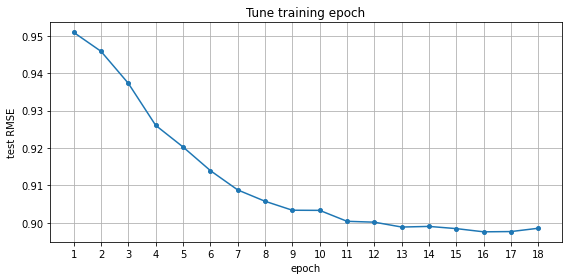

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(np.arange(len(epoch_test_RMSE_list)) + 1, epoch_test_RMSE_list, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(np.arange(len(epoch_test_RMSE_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.show()


Based on this plot, what is the best epoch for your MF model?

Based on the plt, the best epoch is **E=16**.

#### Tune latent dimension####

By this figure, you can find the best epoch for your MF model. Similarly, you can plot how the test RMSE changes when you set different latent dimensions. For this, you need to run the code to initialize and train the MF model for multiple times with different settings of 'latent'. Please run the MF model with 'latent' as {1,3,5,7,9}, and plot the corresponding test RMSE for these five different latent dimensions in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix regularization weight as 0.001**.

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'latent' here.**

In [7]:
# Your Code Here...
latent_dim = [1,3,5,7,9]
model_loss_lm = []
model_rmse_lm = []
for i in latent_dim:
  mf = MF(train_mat, test_mat, latent=i, lr=0.01, reg=0.001)
  epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20, verbose=False)
  model_loss_lm.append(epoch_loss_list)
  model_rmse_lm.append(epoch_test_RMSE_list)


------------------Model description--------------------
Regression coefficient: 0.001, Latent Parameters: 1
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 604908.2902255546
RMSE is 0.9443633083123237

------------------Model description--------------------
Regression coefficient: 0.001, Latent Parameters: 3
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 525131.7737126176
RMSE is 0.9061484598728714

------------------Model description--------------------
Regression coefficient: 0.001, Latent Parameters: 5
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 489349.8043058674
RMSE is 0.8984785768051579

------------------Model description--------------------
Regression coefficient: 0.001, Latent Parameters: 7
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 461180.8520388979
RMSE is 0.898420208354999

------------------Model description--------------------
Regression co

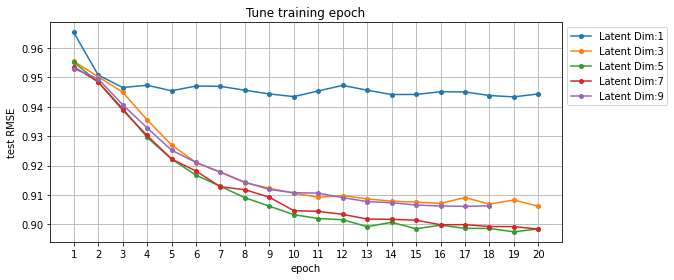

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
for i in range(len(latent_dim)):
  ax.plot(np.arange(len(model_rmse_lm[i])) + 1, model_rmse_lm[i], marker='.', linewidth=1.5, markersize=8, label="Latent Dim:"+str(latent_dim[i]))
ax.set_xticks(np.arange(len(model_rmse_lm[0])) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

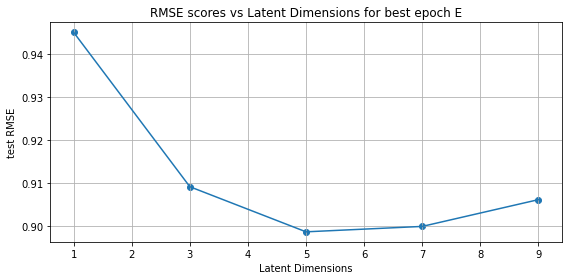

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
Y_lat = []
for i in range(5):
  Y_lat.append(model_rmse_lm[i][16])
ax.scatter(latent_dim, Y_lat, marker='o')
ax.plot(latent_dim, Y_lat)
ax.set_ylabel('test RMSE')
ax.set_xlabel('Latent Dimensions')
ax.set_title('RMSE scores vs Latent Dimensions for best epoch E')
ax.grid(True)
plt.tight_layout()
plt.show()

Based on this plot, what is the best latent dimension for your MF model?

Baseed on the above, when E=16, **the model that performs the best is one which has latent factors of 5**

#### Tune regularization weight####

Last, you can plot how the test RMSE changes when you set different regularization weight. Please run the MF model with 'reg' as {0.0001,0.0005,0.001,0.0015,0.002}, and plot corresponding test RMSE for these five different regularization weights in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix latent dimension as the one you find the best by the previous part**

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'reg' here.**

In [11]:
# Your Code Here...
reg_val = [0.0001,0.0005,0.001,0.0015,0.002]
model_loss_reg = []
model_rmse_reg = []
for i in reg_val:
  mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=i)
  epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20, verbose=False)
  model_loss_reg.append(epoch_loss_list)
  model_rmse_reg.append(epoch_test_RMSE_list)


------------------Model description--------------------
Regression coefficient: 0.0001, Latent Parameters: 5
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 490754.4702205794
RMSE is 0.9014330109672667

------------------Model description--------------------
Regression coefficient: 0.0005, Latent Parameters: 5
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 487770.4464803096
RMSE is 0.8973266066690753

------------------Model description--------------------
Regression coefficient: 0.001, Latent Parameters: 5
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 489290.9123790101
RMSE is 0.8987799451037451

------------------Model description--------------------
Regression coefficient: 0.0015, Latent Parameters: 5
Total epochs: 20, Learning Rate: 0.01
 
After all iterations:
Training loss is 488130.85810061236
RMSE is 0.8966455226632588

------------------Model description--------------------
Regressi

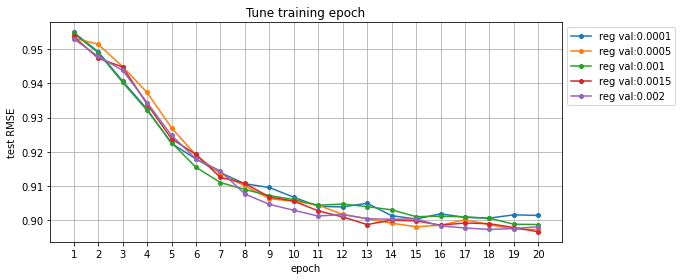

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
for i in range(len(reg_val)):
  ax.plot(np.arange(len(model_rmse_reg[i])) + 1, model_rmse_reg[i], marker='.', linewidth=1.5, markersize=8, label="reg val:"+str(reg_val[i]))
ax.set_xticks(np.arange(len(model_rmse_reg[0])) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

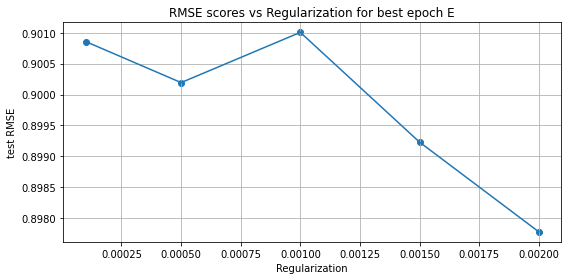

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
Y_reg = []
for i in range(5):
  Y_reg.append(model_rmse_reg[i][16])
ax.scatter(reg_val, Y_reg, marker='o')
ax.plot(reg_val, Y_reg)
ax.set_ylabel('test RMSE')
ax.set_xlabel('Regularization')
ax.set_title('RMSE scores vs Regularization for best epoch E')
ax.grid(True)
plt.tight_layout()
plt.show()

Based on this plot, what is the best regularization weight for your MF model?



Based on the above, for 5 latent factors and epoch E = 16, **the best regularization parameter value** **is 0.002**

## Part 3e: Improve the Model (10 points)

Next, you need to try your best to improve the model so that we can improve our RMSE! This is open-ended, so feel free to try whatever tricks you like. We talked about several in class, plus you can find more in the readings. Write your code in the next cell and print out the RMSE of your new model.

In [26]:
# implement your improved model and print out the RMSE
# Your Code Here...


class biasedMF:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = np.array(train_mat)  # the training rating matrix of size (#user, #movie)
        self.test_mat = np.array(test_mat)  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized

        prediction_mat = train_mat.copy()
        prediction_mat[prediction_mat == 0] = np.nan
        mu = np.nanmean(prediction_mat)
        self.mu = mu

        bi = [np.nanmean(prediction_mat[:, idx]) - mu for idx in range(prediction_mat.shape[1])]
        bi = np.array([0 if np.isnan(x) else x for x in bi])
        bu = [np.nanmean(prediction_mat[idx, :]) - mu for idx in range(prediction_mat.shape[0])]
        bu = np.array([0 if np.isnan(x) else x for x in bu])
        self.bu = np.array(bu)
        self.bi = np.array(bi)

    def train(self, epoch=1, verbose=True):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch 
        Output: epoch_loss_list -- a list recording the training loss for each epoch
                epoch_test_RMSE_list -- a list recording the testing RMSE after each training epoch
        """
        print("------------------Model description--------------------")
        print("Regression coefficient: {}, Latent Parameters: {}".format(self.reg, self.latent))
        print("Total epochs: {}, Learning Rate: {}".format(epoch, self.lr))
        print(" ")
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        prev_RMSE = 0
        times = 0
        for ep in range(epoch):
            """ 
            Write your code here to implement the training process for one epoch, 
            and at the end of each epoch, print out the epoch number, the training loss after this epoch, 
            and the test RMSE after this epoch
            """
            #Shuffle Matrix           
            training_indices = np.arange(self.num_sample)
            np.random.shuffle(training_indices)  # randomly shuffle the training samples
            ratings = self.train_mat[self.sample_user, self.sample_movie]
            for idx in training_indices:
              u=self.sample_user[idx]
              i=self.sample_movie[idx]
              err_ui = self.train_mat[u,i] - self.P[u,:].dot(self.Q[i,:])-self.mu-self.bu[u]-self.bi[i]
              newP = self.P.copy()
              newQ = self.Q.copy()
              self.P[u,:] += self.lr * (2 * err_ui * newQ[i,:] - 2*self.reg * newP[u,:])
              self.Q[i,:] += self.lr * (2 * err_ui * newP[u,:] - 2*self.reg * newQ[i,:])
              self.bu[u] += self.lr*(2 * err_ui)-2*self.reg*self.bu[u]
              self.bi[i] += self.lr*(2 * err_ui)-2*self.reg*self.bi[i]
            E = (self.train_mat[self.sample_user, self.sample_movie] - self.predict()[self.sample_user, self.sample_movie])**2 
            obj = E.sum()+ self.reg*((self.P**2).sum()+(self.Q**2).sum())        
            epoch_loss_list.append(obj)
            E_test = (self.test_mat[self.test_indicator_mat==1] -self.predict()[self.test_indicator_mat==1])**2
            A,B = self.test_mat.nonzero()
            rmse = np.sqrt(E_test.sum()/(len(A)))
            epoch_test_RMSE_list.append(rmse)
            
            if verbose:
              print("Iteramtion {}:".format(ep))
              print("Training loss of the current epoch is {}".format(obj))
              print("RMSE for current epoc is {}".format(rmse))
              print("")
            
            

        print("After all iterations:")
        print("Training loss is {}".format(obj))
        print("RMSE is {}".format(rmse))
        print("") 
        """
        End of your code for this function
        """   
        return epoch_loss_list, epoch_test_RMSE_list
        
        
    def predict(self):
        mu = self.mu*np.ones((self.train_mat.shape[0],self.train_mat.shape[1]))
        bi = self.bi*np.ones((self.train_mat.shape[0],self.train_mat.shape[1]))
        bu = np.ones((self.train_mat.shape[0],self.train_mat.shape[1]))
        bu = (bu.transpose()*self.bu).transpose()
        aux = (mu+bi+bu)
        prediction_mat = np.matmul(self.P, self.Q.T)
        prediction_mat+=aux
        return prediction_mat

In [30]:
mf = biasedMF(train_mat, test_mat, latent=5, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=25, verbose=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


------------------Model description--------------------
Regression coefficient: 0.001, Latent Parameters: 5
Total epochs: 25, Learning Rate: 0.01
 
Iteramtion 0:
Training loss of the current epoch is 578303.8207467445
RMSE for current epoc is 0.9276478606331077

Iteramtion 1:
Training loss of the current epoch is 564246.2774102018
RMSE for current epoc is 0.920632906893014

Iteramtion 2:
Training loss of the current epoch is 547411.6562686265
RMSE for current epoc is 0.9134349821171707

Iteramtion 3:
Training loss of the current epoch is 529266.902459988
RMSE for current epoc is 0.9054864094204516

Iteramtion 4:
Training loss of the current epoch is 516528.38967235683
RMSE for current epoc is 0.9002469555840488

Iteramtion 5:
Training loss of the current epoch is 506510.42988554604
RMSE for current epoc is 0.8973038672190595

Iteramtion 6:
Training loss of the current epoch is 498290.40552805096
RMSE for current epoc is 0.8945529125570222

Iteramtion 7:
Training loss of the current epo

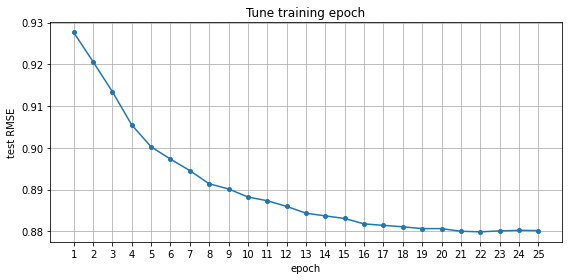

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(np.arange(len(epoch_test_RMSE_list)) + 1, epoch_test_RMSE_list, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(np.arange(len(epoch_test_RMSE_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.show()

And please briefly explain what your new model does to improve the performance.

To improve the RMSE score, I have augmented the matrix factorization code with bias, since biases tend to capture much of the observed
signal. For this model, the loss function is given by:
<center>$\underset{\mathbf{P},\mathbf{Q}}{\text{min}}\,\,L=\sum_{(u,i)\in\mathcal{O}}(pred-r_{u,i})^2+\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}}+\mathbf{b_i}^2+\mathbf{b_u}^2)$</center>

where $pred$ is given as:
<center>$pred = \mathbf{P}_u\cdot\mathbf{Q}^\top_i+\mu +\mathbf{b_i}+\mathbf{b_u} $</center>
<br>
and $\mathbf{P}$ is the user latent factor matrix of size (#user, #latent); $\mathbf{Q}$ is the movie latent factor matrix of size (#movie, #latent); $\mathcal{O}$ is a user-movie pair set containing all user-movie pairs having ratings in train_mat; $r_{u,i}$ represents the rating for user u and movie i; $\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}}+b_i^2+b_u^2)$ is the regularization term.

Here, the observed rating is broken down into its four
components: global average, item bias, user bias, and useritem
interaction. This allows each component to explain
only the part of a signal relevant to it.

With such a model, using latent factors of 5, regularization weight of 0.001 RMSE I got is 0.879
